<a href="https://colab.research.google.com/github/April03exo/BSIS-2A_RAPANUT-APRIL-JOY-V./blob/main/FINALPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
 df = pd.read_csv('https://raw.githubusercontent.com/April03exo/BSIS-2A_RAPANUT-APRIL-JOY-V./refs/heads/main/student_grades_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             100 non-null    int64  
 1   Study_Hours            100 non-null    float64
 2   Attendance_Percentage  100 non-null    float64
 3   Quiz_Average           100 non-null    float64
 4   Final_Grade            100 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [ ]:
df.head()

,Student_ID,Study_Hours,Attendance_Percentage,Quiz_Average,Final_Grade
0,1,8.116262,51.571459,82.101582,43.576277
1,2,19.063572,81.820521,54.206998,45.175683
2,3,14.907885,65.717799,58.081436,53.822645
3,4,12.374511,75.428535,94.927709,59.226273
4,5,3.964354,95.378324,80.321453,44.169962


In [ ]:
df.describe()

,Student_ID,Study_Hours,Attendance_Percentage,Quiz_Average,Final_Grade
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,9.933434,74.891586,75.880067,49.554008
std,29.011492,5.652299,14.655563,14.671312,8.306661
min,1.000000,1.104920,50.347607,50.253079,29.071858
25%,25.750000,4.670814,62.100226,63.843993,43.787599
50%,50.500000,9.818707,75.281243,78.127747,49.778791
75%,75.250000,14.873859,88.309180,87.618347,56.605490
max,100.000000,19.750852,99.282523,99.502693,67.636659


In [ ]:
df.mean()

,0
Student_ID,50.500000
Study_Hours,9.933434
Attendance_Percentage,74.891586
Quiz_Average,75.880067
Final_Grade,49.554008


In [ ]:
df.median()

,0
Student_ID,50.500000
Study_Hours,9.818707
Attendance_Percentage,75.281243
Quiz_Average,78.127747
Final_Grade,49.778791


In [ ]:
df.min()

,0
Student_ID,1.000000
Study_Hours,1.104920
Attendance_Percentage,50.347607
Quiz_Average,50.253079
Final_Grade,29.071858


In [ ]:
df.max()

,0
Student_ID,100.000000
Study_Hours,19.750852
Attendance_Percentage,99.282523
Quiz_Average,99.502693
Final_Grade,67.636659


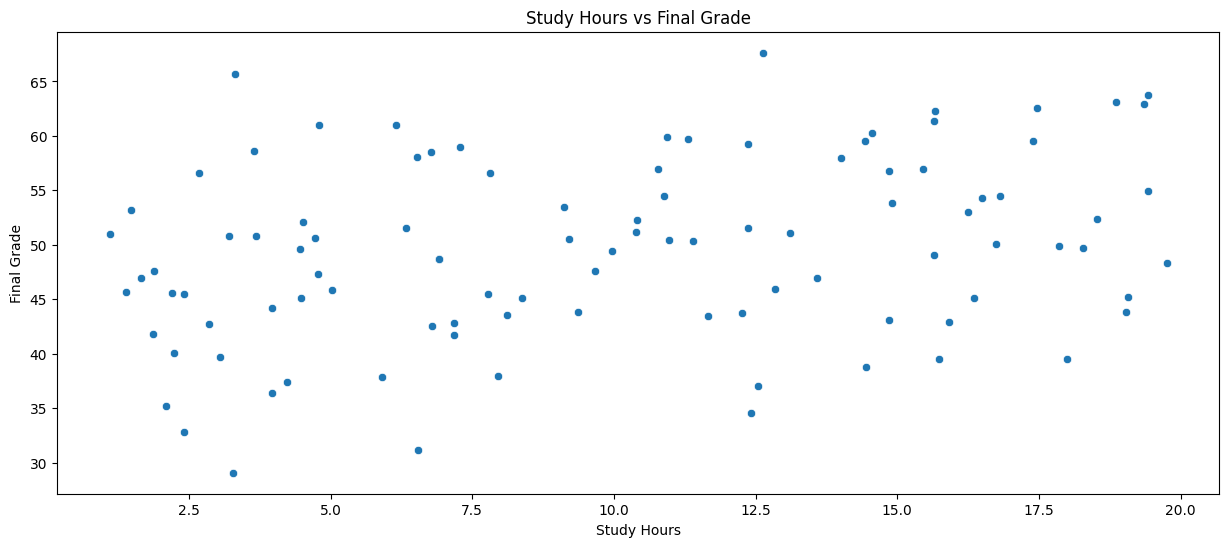

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Study_Hours', y='Final_Grade', data=df)
plt.title("Study Hours vs Final Grade")
plt.xlabel("Study Hours")
plt.ylabel("Final Grade")
plt.show()

In [ ]:
df.dropna()

,Student_ID,Study_Hours,Attendance_Percentage,Quiz_Average,Final_Grade
0,1,8.116262,51.571459,82.101582,43.576277
1,2,19.063572,81.820521,54.206998,45.175683
2,3,14.907885,65.717799,58.081436,53.822645
3,4,12.374511,75.428535,94.927709,59.226273
4,5,3.964354,95.378324,80.321453,44.169962
...,...,...,...,...,...
95,96,10.382116,67.460479,76.112163,51.182953
96,97,10.931924,86.297784,88.499678,59.932607
97,98,9.123279,94.855513,60.791051,53.485009
98,99,1.482963,94.354321,81.144524,53.181605


In [ ]:
scaler = StandardScaler()
X = df[['Study_Hours', 'Attendance_Percentage', 'Final_Grade']]
X_scaled = scaler.fit_transform(X)

In [ ]:
y = df['Final_Grade']

In [ ]:
X_line, X_test, y_line, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_line, y_line)

LinearRegression()

In [ ]:
def predict_grade(study_hours, attendance, quiz_average):
    new_data = scaler.transform([[study_hours, attendance, final_grade]])
    predicted_grade = model.predict(new_data)
    return predicted_grade[0]

In [ ]:
print("\n--- Grade Prediction Tool ---")
study_hours = float(input("Enter hypothetical study hours: "))
attendance = float(input("Enter hypothetical attendance: "))


--- Grade Prediction Tool ---
Enter hypothetical study hours: 8
Enter hypothetical attendance: 5


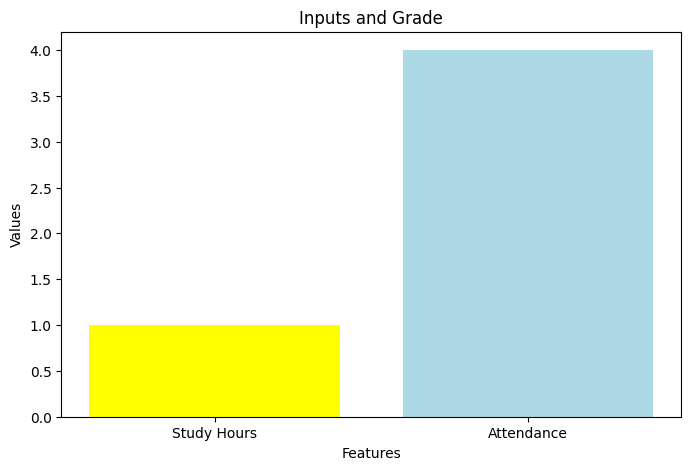

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(['Study Hours', 'Attendance'], [study_hours, attendance], color=['yellow', 'lightblue'])
plt.title('Inputs and Grade')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
y_pred = model.predict(X_line)

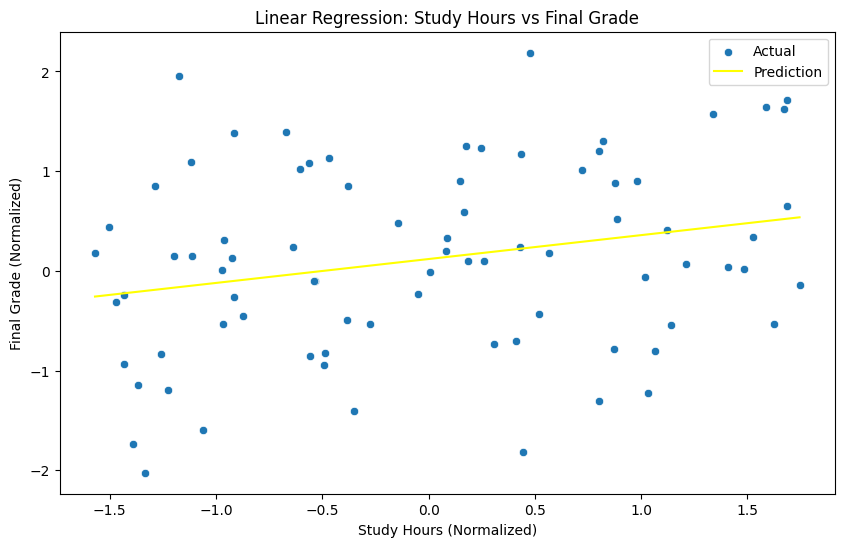

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_line['Study_Hours'], y=y_line, label="Actual")
sns.lineplot(x=X_line['Study_Hours'], y=y_pred, color='yellow', label="Prediction")
plt.title("Linear Regression: Study Hours vs Final Grade")
plt.xlabel("Study Hours (Normalized)")
plt.ylabel("Final Grade (Normalized)")
plt.legend()
plt.show()

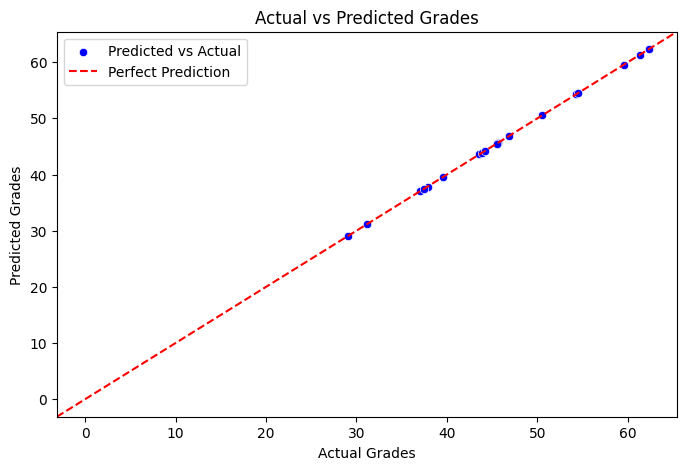

In [ ]:
plt.figure(figsize=(8, 5))
y_pred_test = model.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred_test, color='blue', label="Predicted vs Actual")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.title("Actual vs Predicted Grades")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.legend()
plt.show()